# Trends in snowfall at Various Percentiles

In [1]:
#import packages
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
#from intake import open_catalog
import cartopy.io.shapereader as shpreader
import mygrads as mg
#import Ngl
#import Nio
#import fiona
import matplotlib as mpl
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import NaturalEarthFeature
from cartopy.feature import COASTLINE
from clim680_function import xyticks
import pymannkendall as mk

In [2]:
f='/project/xprecip/merra2_ncfiles/snow/daily_resampled/anomalies/norm_snowfall_anoms.nc'
DS_norm_snow=xr.open_dataset(f)
DS_norm_snow

<xarray.Dataset>
Dimensions:    (lat: 66, lon: 120, time: 3850)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-02-28
  * lon        (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat        (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    dayofyear  (time) int64 ...
Data variables:
    PRECSNO    (time, lat, lon) float32 ...

In [3]:
snow_norm=DS_norm_snow['PRECSNO']
snow_norm

<xarray.DataArray 'PRECSNO' (time: 3850, lat: 66, lon: 120)>
[30492000 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-02-28
  * lon        (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat        (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    dayofyear  (time) int64 1 2 3 4 5 6 7 8 9 10 ... 51 52 53 54 55 56 57 58 59

## 'Extreme' Snowfall (95th Percentile of Normalized snowfall anomalies)

In [4]:
xarray_sorted=snow_norm.argsort(axis=0,kind='quicksort')
xarray_sorted

<xarray.DataArray 'PRECSNO' (time: 3850, lat: 66, lon: 120)>
array([[[   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        ...,
        [2715, 2309,  797, ...,  451, 1895, 1895],
        [ 887, 1994,  522, ...,  781,  781, 1895],
        [ 522,  522, 1875, ...,  781,  781, 1895]],

       [[2558, 2558, 2558, ..., 2558, 2558, 2558],
        [2558, 2558, 2558, ..., 2558, 2558, 2558],
        [2558, 2558, 2558, ..., 2558, 2558, 2558],
        ...,
        [3437, 2579, 2332, ..., 1173,  451, 2256],
        [1067, 3167,  161, ..., 2947, 2947, 2256],
        [1875, 1875,  522, ..., 2947, 2947,  781]],

       [[2559, 2559, 2559, ..., 2559, 2559, 2559],
        [2559, 2559, 2559, ..., 2559, 2559, 2559],
        [2559, 2559, 2559, ..., 2559, 2559, 2559],
        ...,
...
        ...,
        [3796, 3756, 2289, ..., 1484, 1646, 1646],
        [ 824,  824,  426, ...,  817, 3195, 3205],
        [1071, 1604,  668, ...,  664, 3205, 3195]],

       [[1203, 1203, 1203, ..., 1203, 1203, 1203],
        [1203, 1203, 1203, ..., 1203, 1203, 1203],
        [1203, 1203, 1203, ..., 1203, 1203, 1203],
        ...,
        [ 187,  429, 2873, ..., 1646, 3195,  970],
        [ 500,  641,  641, ..., 3805,  970,  970],
        [ 426, 2288, 2891, ..., 3526, 3805, 3691]],

       [[3849, 3849, 3849, ..., 3849, 3849, 3849],
        [3849, 3849, 3849, ..., 3849, 3849, 3849],
        [3849, 3849, 3849, ..., 3849, 3849, 3849],
        ...,
        [ 592, 1061, 1454, ..., 3805,  970, 3195],
        [ 187,  426, 1454, ..., 2223, 3805, 3195],
        [ 824,  426,  641, ...,  817,  817, 3805]]])
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-02-28
  * lon        (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat        (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    dayofyear  (time) int64 1 2 3 4 5 6 7 8 9 10 ... 51 52 53 54 55 56 57 58 59

In [5]:
sorted_snowfall=snow_norm.where(xarray_sorted)
sorted_snowfall

<xarray.DataArray 'PRECSNO' (time: 3850, lat: 66, lon: 120)>
array([[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [-4.02195036e-01, -3.56647253e-01, -3.00286770e-01, ...,
         -6.23139322e-01, -5.06699979e-01, -4.52238798e-01],
        [-3.45817626e-01,  2.74654180e-01,  2.37033233e-01, ...,
         -4.91288066e-01, -5.40339530e-01, -5.86734712e-01],
        [-1.73689395e-01,  1.32054642e-01,  8.57788771e-02, ...,
         -5.58795571e-01, -5.88789463e-01, -6.54566228e-01]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
...
         -5.69945037e-01, -5.34648240e-01, -4.57496792e-01],
        [-1.58026457e-01, -1.11733191e-02,  2.14727654e-04, ...,
         -6.92776203e-01, -6.62718534e-01, -6.08539164e-01],
        [ 2.53958374e-01,  3.85569125e-01,  3.50918949e-01, ...,
         -7.00697601e-01, -6.93093717e-01, -6.74432158e-01]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [-2.76043892e-01, -3.37126851e-01, -2.19219476e-01, ...,
         -1.96752369e-01, -2.70372808e-01, -3.62261027e-01],
        [-2.97678083e-01, -2.81878173e-01, -1.73116729e-01, ...,
          4.80706394e-01,  6.11309707e-02, -2.33307600e-01],
        [-2.08381832e-01, -2.26798169e-02,  1.62061229e-01, ...,
          1.75220504e-01, -5.90787642e-02, -3.36533546e-01]]],
      dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-02-28
  * lon        (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat        (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    dayofyear  (time) int64 1 2 3 4 5 6 7 8 9 10 ... 51 52 53 54 55 56 57 58 59

In [6]:
monthly_groups=sorted_snowfall.groupby('time.month').quantile(0.95,dim='time')
monthly_groups

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1390: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


<xarray.DataArray 'PRECSNO' (month: 3, lat: 66, lon: 120)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [2.04305613, 2.16073728, 2.33138046, ..., 2.23260468,
         2.37260823, 2.20309172],
        [2.12903109, 2.26512216, 2.27784961, ..., 2.07882026,
         2.15285925, 2.06580726],
        [2.21031165, 2.18505864, 2.08161526, ..., 2.18789468,
         2.04195743, 2.00132939]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [1.69843242, 1.85437613, 1.88596466, ..., 1.94945782,
         1.92504849, 1.98445933],
        [1.94359739, 1.8093241 , 1.81804   , ..., 1.98428988,
         1.92667997, 1.99555441],
        [1.93809069, 1.90545813, 1.6530851 , ..., 1.8670591 ,
         1.93270478, 2.01011369]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [1.71810126, 1.9949172 , 2.10554194, ..., 2.00988054,
         2.00330797, 2.12123275],
        [1.87844664, 1.89782912, 2.04556642, ..., 2.00766153,
         2.03913416, 2.20648888],
        [1.8002398 , 1.9284448 , 2.0515363 , ..., 2.16536241,
         2.11333847, 2.20112067]]])
Coordinates:
  * lon       (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat       (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    quantile  float64 0.95
  * month     (month) int64 1 2 12

In [11]:
dec_95th=monthly_groups.sel(month=12)
dec_95th

<xarray.DataArray 'PRECSNO' (lat: 66, lon: 120)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [1.71810126, 1.9949172 , 2.10554194, ..., 2.00988054, 2.00330797,
        2.12123275],
       [1.87844664, 1.89782912, 2.04556642, ..., 2.00766153, 2.03913416,
        2.20648888],
       [1.8002398 , 1.9284448 , 2.0515363 , ..., 2.16536241, 2.11333847,
        2.20112067]])
Coordinates:
  * lon       (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat       (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    quantile  float64 0.95
    month     int64 12

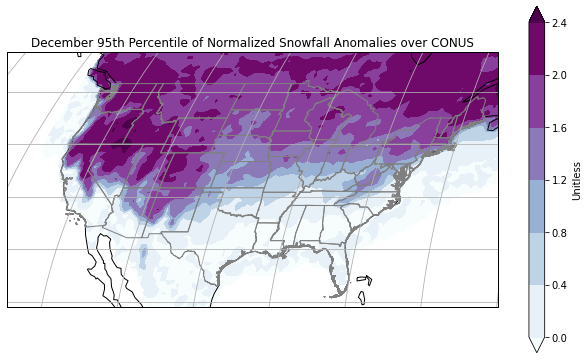

In [12]:
fig = plt.figure(figsize=(11,8.5))
ax=plt.axes(projection=ccrs.Robinson())
cs=ax.contourf(dec_95th['lon'], dec_95th['lat'], dec_95th,transform = ccrs.PlateCarree(),cmap='BuPu',extend='both')
ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')
cbar=plt.colorbar(cs, shrink=0.75,label='Unitless')
plt.title('December 95th Percentile of Normalized Snowfall Anomalies over CONUS')
plt.savefig('/homes/areed29/CLIM997/summer22_research/dec_95thsnowfall.png')

In [7]:
jan_95th=monthly_groups.sel(month=1)
jan_95th

<xarray.DataArray 'PRECSNO' (lat: 66, lon: 120)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [2.04305613, 2.16073728, 2.33138046, ..., 2.23260468, 2.37260823,
        2.20309172],
       [2.12903109, 2.26512216, 2.27784961, ..., 2.07882026, 2.15285925,
        2.06580726],
       [2.21031165, 2.18505864, 2.08161526, ..., 2.18789468, 2.04195743,
        2.00132939]])
Coordinates:
  * lon       (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat       (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    quantile  float64 0.95
    month     int64 1

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


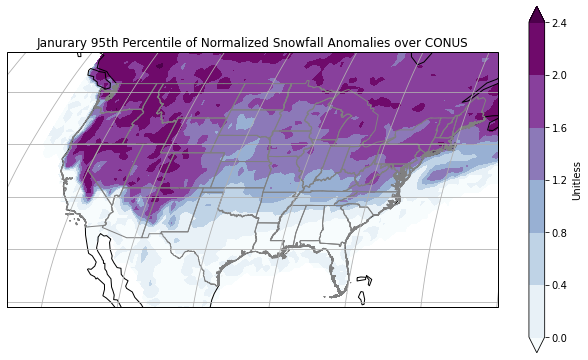

In [8]:
fig = plt.figure(figsize=(11,8.5))
ax=plt.axes(projection=ccrs.Robinson())
cs=ax.contourf(jan_95th['lon'], jan_95th['lat'], jan_95th,transform = ccrs.PlateCarree(),cmap='BuPu',extend='both')
ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')
cbar=plt.colorbar(cs, shrink=0.75,label='Unitless')
plt.title('Janurary 95th Percentile of Normalized Snowfall Anomalies over CONUS')
plt.savefig('/homes/areed29/CLIM997/summer22_research/jan_95thsnowfall.png')

In [9]:
feb_95th=monthly_groups.sel(month=2)
feb_95th

<xarray.DataArray 'PRECSNO' (lat: 66, lon: 120)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [1.69843242, 1.85437613, 1.88596466, ..., 1.94945782, 1.92504849,
        1.98445933],
       [1.94359739, 1.8093241 , 1.81804   , ..., 1.98428988, 1.92667997,
        1.99555441],
       [1.93809069, 1.90545813, 1.6530851 , ..., 1.8670591 , 1.93270478,
        2.01011369]])
Coordinates:
  * lon       (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat       (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    quantile  float64 0.95
    month     int64 2

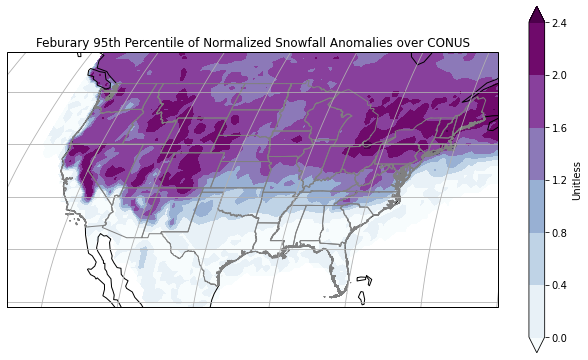

In [10]:
fig = plt.figure(figsize=(11,8.5))
ax=plt.axes(projection=ccrs.Robinson())
cs=ax.contourf(feb_95th['lon'], feb_95th['lat'], feb_95th,transform = ccrs.PlateCarree(),cmap='BuPu',extend='both')
ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')
cbar=plt.colorbar(cs, shrink=0.75,label='Unitless')
plt.title('Feburary 95th Percentile of Normalized Snowfall Anomalies over CONUS')
plt.savefig('/homes/areed29/CLIM997/summer22_research/feb_95thsnowfall.png')

### Trends (the more interesting part)

In [13]:
monthly_timeseries=[]
for i in range(1980,2022,1):
    #print(i)
    year_of_data = sorted_snowfall.sel(time = slice(str(i)+"-01-01",str(i)+"-12-31")).groupby('time.month')
    timeseries_95th=year_of_data.quantile(0.95,dim='time')
    monthly_timeseries.append(timeseries_95th)

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1390: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1390: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1390: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1390: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1390: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1390: RuntimeWarning: All-NaN slice encountered
  overwr

In [14]:
monthly_ts=xr.concat(monthly_timeseries,dim='month')
monthly_ts

<xarray.DataArray 'PRECSNO' (month: 126, lat: 66, lon: 120)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [5.00737238, 4.03693449, 2.7110101 , ..., 2.31924415,
         2.02836007, 1.69536436],
        [4.91262805, 3.25036073, 2.50070858, ..., 2.6027565 ,
         2.08040905, 1.96797019],
        [2.7762115 , 2.13009202, 2.84119785, ..., 2.65216565,
         2.25521582, 2.16517812]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [4.35568813, 5.90622119, 3.62988578, ..., 1.97016394,
         1.75137857, 1.64254433],
        [5.62568177, 3.75543619, 2.74780841, ..., 1.79435173,
         1.56620677, 1.37976897],
        [3.39915026, 2.40235968, 1.70332609, ..., 1.50115607,
         1.45709214, 1.3570767 ]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [3.37841666, 2.76610255, 2.12762666, ..., 1.04957503,
         1.24175885, 1.20444444],
        [2.64452463, 1.74855417, 1.76200938, ..., 1.44529641,
         1.18328846, 0.97406557],
        [1.12941328, 1.18856114, 2.26508594, ..., 1.66054362,
         1.64721495, 1.35620642]]])
Coordinates:
  * lon       (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat       (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    quantile  float64 0.95
  * month     (month) int64 1 2 12 1 2 12 1 2 12 1 2 ... 12 1 2 12 1 2 12 1 2 12

### December

In [24]:
dec_ts=monthly_ts.sel(month=12)
dec_ts

<xarray.DataArray 'PRECSNO' (month: 42, lat: 66, lon: 120)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [ 0.47211374,  0.18450985,  2.25814503, ...,  1.02108046,
          1.08963704,  1.12473899],
        [ 0.41854742,  2.13912731,  2.82383204, ...,  1.36073589,
          1.32189542,  1.30415976],
        [ 1.63684511,  2.47953713,  2.48611343, ...,  1.53498554,
          1.62532127,  1.65747136]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [-0.30617116, -0.23652714,  0.95611709, ...,  3.5457164 ,
          2.67142636,  2.23486358],
        [ 0.88063085,  1.64081573,  1.84713227, ...,  3.70791519,
          3.21700573,  2.36476028],
        [ 2.30555391,  2.08014953,  2.32306892, ...,  3.86286664,
          3.66961622,  3.19470799]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [ 3.37841666,  2.76610255,  2.12762666, ...,  1.04957503,
          1.24175885,  1.20444444],
        [ 2.64452463,  1.74855417,  1.76200938, ...,  1.44529641,
          1.18328846,  0.97406557],
        [ 1.12941328,  1.18856114,  2.26508594, ...,  1.66054362,
          1.64721495,  1.35620642]]])
Coordinates:
  * lon       (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat       (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    quantile  float64 0.95
  * month     (month) int64 12 12 12 12 12 12 12 12 ... 12 12 12 12 12 12 12 12

In [31]:
from scipy.stats import mstats
months=np.arange(0,42,1)
nlons=len(dec_ts['lon'])
nlats=len(dec_ts['lat'])
#p_array=np.zeros((nlats,nlons))
#r_array=np.zeros((nlats,nlons))
m_array_dec=np.zeros((nlats,nlons))
low_slope_dec=np.zeros((nlats,nlons))
high_slope_dec=np.zeros((nlats,nlons))
for i in range(nlons):
    for j in range(nlats): 
        y=dec_ts[:,j,i]
        slope_thiel, intercept_thiel, low_slope,high_slope=mstats.theilslopes(y, x=months, alpha=0.95)
        #m,b,r,p,e = linregress(months,y)
        m_array_dec[j,i]=slope_thiel
        low_slope_dec[j,i]=low_slope
        high_slope_dec[j,i]=high_slope
        #r_array[j,i]=r
        #p_array[j,i]=p

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:242: RuntimeWarning: invalid value encountered in subtract
  deltay = y[:, np.newaxis] - y


/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as 

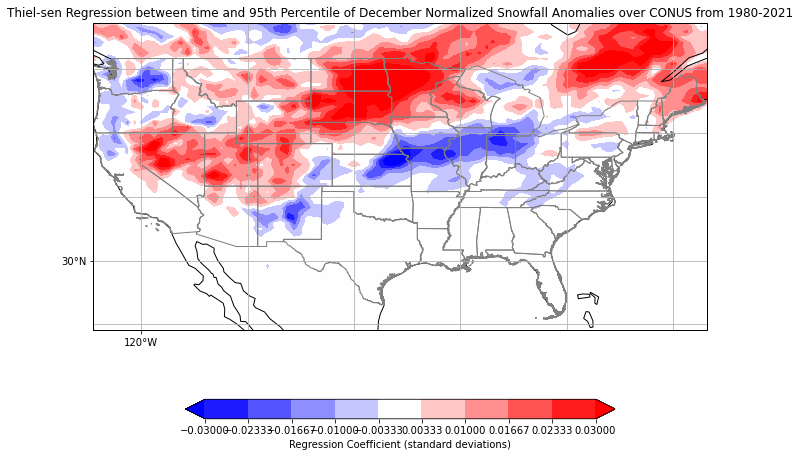

In [32]:
clevs=np.linspace(-0.03,0.03,10)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=m_array_dec
data,lon=add_cyclic_point(data,coord=dec_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,dec_ts['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Regression Coefficient (standard deviations)')

# Add title
plt.title('Thiel-sen Regression between time and 95th Percentile of December Normalized Snowfall Anomalies over CONUS from 1980-2021')
plt.savefig('/homes/areed29/CLIM997/summer22_research/dec95th_thielsen_snowfall.png')

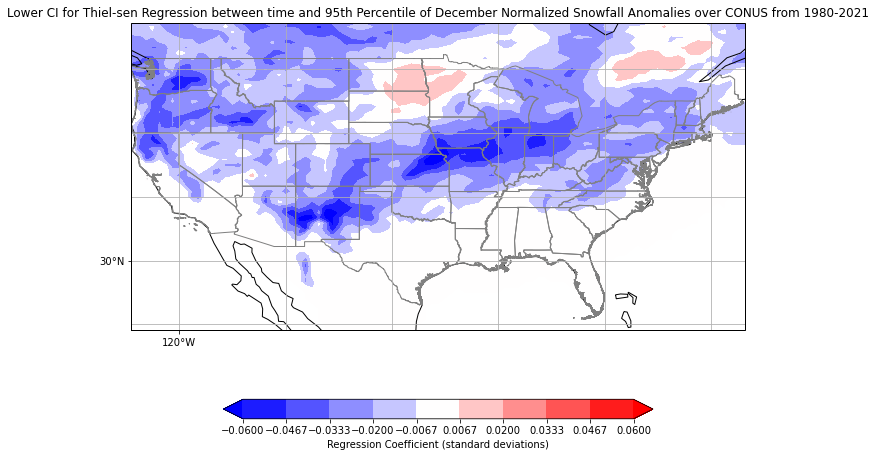

In [34]:
#clevs=np.arange(-0.2,0.2,0.025)
#clevs=np.linspace(-0.05,0.05,10)
clevs=np.linspace(-0.06,0.06,10)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=low_slope_dec
data,lon=add_cyclic_point(data,coord=dec_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,dec_ts['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Regression Coefficient (standard deviations)')

# Add title
plt.title('Lower CI for Thiel-sen Regression between time and 95th Percentile of December Normalized Snowfall Anomalies over CONUS from 1980-2021')
plt.savefig('/homes/areed29/CLIM997/summer22_research/dec95th_thielsen_snowfall_lowci.png')

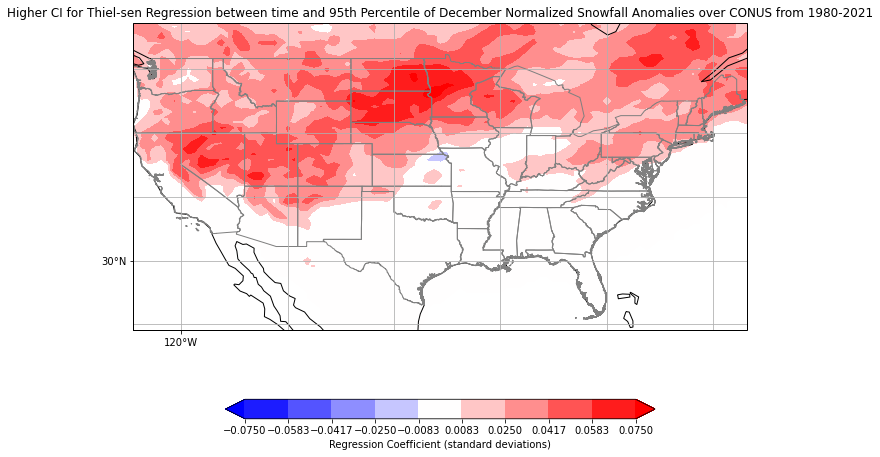

In [36]:
clevs=np.linspace(-0.075,0.075,10)
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=high_slope_dec
data,lon=add_cyclic_point(data,coord=dec_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,dec_ts['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Regression Coefficient (standard deviations)')

# Add title
plt.title('Higher CI for Thiel-sen Regression between time and 95th Percentile of December Normalized Snowfall Anomalies over CONUS from 1980-2021')
plt.savefig('/homes/areed29/CLIM997/summer22_research/dec95th_thielsen_snowfall_highci.png')

### Janurary

In [15]:
jan_ts=monthly_ts.sel(month=1)
jan_ts

<xarray.DataArray 'PRECSNO' (month: 42, lat: 66, lon: 120)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [ 5.00737238,  4.03693449,  2.7110101 , ...,  2.31924415,
          2.02836007,  1.69536436],
        [ 4.91262805,  3.25036073,  2.50070858, ...,  2.6027565 ,
          2.08040905,  1.96797019],
        [ 2.7762115 ,  2.13009202,  2.84119785, ...,  2.65216565,
          2.25521582,  2.16517812]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [ 2.44252801,  2.99264324,  3.28065932, ...,  0.04691074,
          0.21762661,  0.41715852],
        [ 2.48591697,  3.22003579,  3.67080343, ..., -0.02565325,
          0.05262922,  0.21261008],
        [ 2.64998758,  3.00556052,  4.44750416, ...,  0.13176557,
          0.0665957 ,  0.13834187]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [ 0.53399575,  0.81080955,  1.24102432, ...,  2.3428762 ,
          1.42853892,  0.88103306],
        [ 0.93202129,  1.68853742,  1.78799623, ...,  3.02835011,
          1.57942528,  0.85261437],
        [ 1.91281766,  2.34699941,  1.90723979, ...,  2.17519391,
          0.86370191,  0.29753014]]])
Coordinates:
  * lon       (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat       (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    quantile  float64 0.95
  * month     (month) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1

In [16]:
from scipy.stats import mstats
months=np.arange(0,42,1)
nlons=len(jan_ts['lon'])
nlats=len(jan_ts['lat'])
#p_array=np.zeros((nlats,nlons))
#r_array=np.zeros((nlats,nlons))
m_array_jan=np.zeros((nlats,nlons))
low_slope_jan=np.zeros((nlats,nlons))
high_slope_jan=np.zeros((nlats,nlons))
for i in range(nlons):
    for j in range(nlats): 
        y=jan_ts[:,j,i]
        slope_thiel, intercept_thiel, low_slope,high_slope=mstats.theilslopes(y, x=months, alpha=0.95)
        #m,b,r,p,e = linregress(months,y)
        m_array_jan[j,i]=slope_thiel
        low_slope_jan[j,i]=low_slope
        high_slope_jan[j,i]=high_slope
        #r_array[j,i]=r
        #p_array[j,i]=p

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:242: RuntimeWarning: invalid value encountered in subtract
  deltay = y[:, np.newaxis] - y


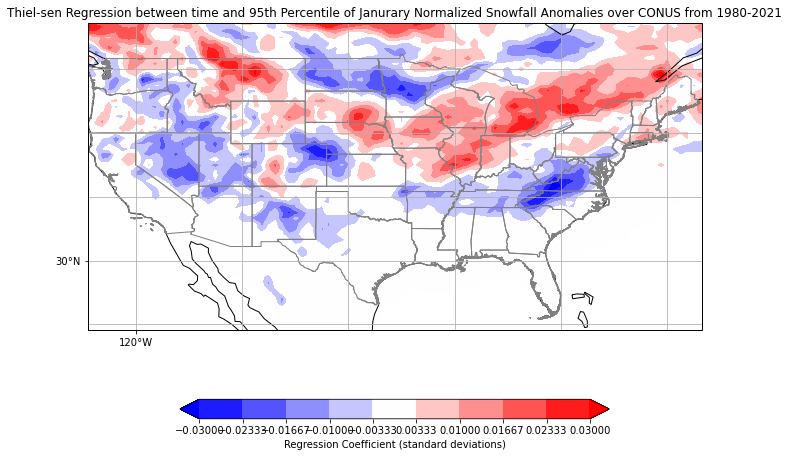

In [19]:
#clevs=np.arange(-0.2,0.2,0.025)
#clevs=np.linspace(-0.05,0.05,10)
clevs=np.linspace(-0.03,0.03,10)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=m_array_jan
data,lon=add_cyclic_point(data,coord=jan_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,jan_ts['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Regression Coefficient (standard deviations)')

# Add title
plt.title('Thiel-sen Regression between time and 95th Percentile of Janurary Normalized Snowfall Anomalies over CONUS from 1980-2021')
plt.savefig('/homes/areed29/CLIM997/summer22_research/jan95th_thielsen_snowfall.png')

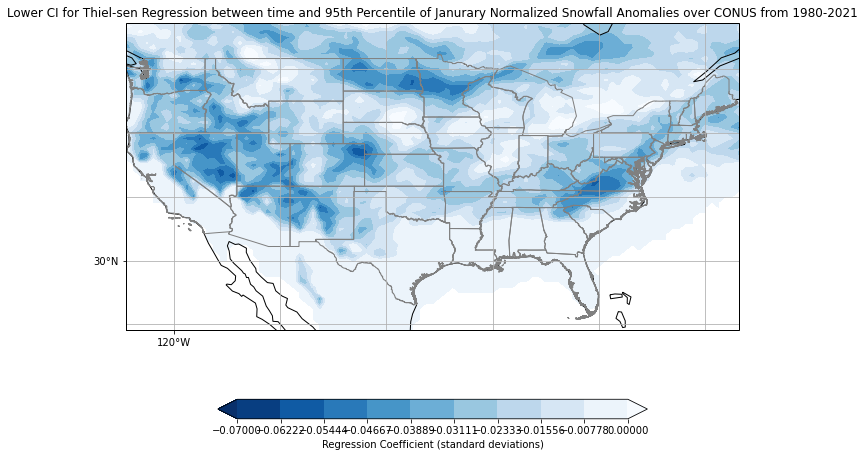

In [21]:
#clevs=np.arange(-0.2,0.2,0.025)
#clevs=np.linspace(-0.05,0.05,10)
clevs=np.linspace(-0.07,0,10)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=low_slope_jan
data,lon=add_cyclic_point(data,coord=jan_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,jan_ts['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='Blues_r',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Regression Coefficient (standard deviations)')

# Add title
plt.title('Lower CI for Thiel-sen Regression between time and 95th Percentile of Janurary Normalized Snowfall Anomalies over CONUS from 1980-2021')
plt.savefig('/homes/areed29/CLIM997/summer22_research/jan95th_thielsen_snowfall_lowci.png')

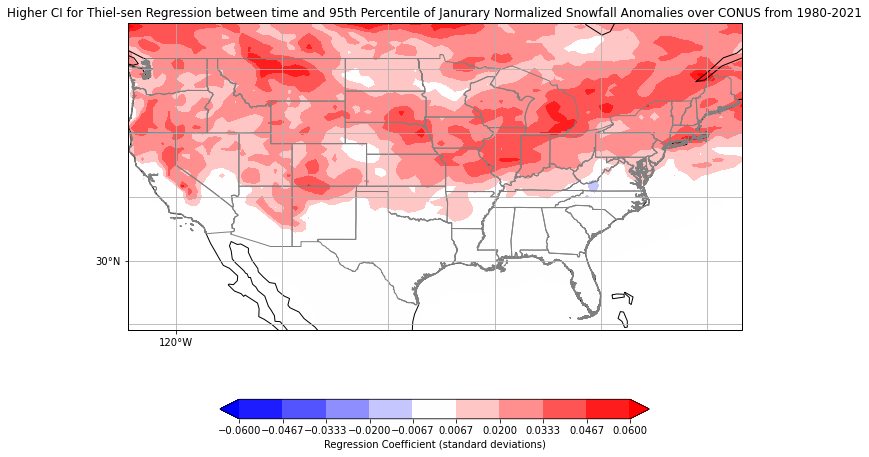

In [23]:
clevs=np.linspace(-0.06,0.06,10)
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=high_slope_jan
data,lon=add_cyclic_point(data,coord=jan_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,jan_ts['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Regression Coefficient (standard deviations)')

# Add title
plt.title('Higher CI for Thiel-sen Regression between time and 95th Percentile of Janurary Normalized Snowfall Anomalies over CONUS from 1980-2021')
plt.savefig('/homes/areed29/CLIM997/summer22_research/jan95th_thielsen_snowfall_highci.png')

### Feburary

In [37]:
feb_ts=monthly_ts.sel(month=2)
feb_ts

<xarray.DataArray 'PRECSNO' (month: 42, lat: 66, lon: 120)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [ 0.11124674,  0.31920867,  0.28460011, ...,  0.89194572,
          0.70712751,  0.77792304],
        [ 0.52220461,  0.41078298,  0.3729362 , ...,  1.49073205,
          0.77635523,  0.69106768],
        [ 0.51899095,  0.35149274,  0.34196213, ...,  1.73744645,
          1.13317554,  0.81552252]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [ 1.58253946,  1.97789316,  1.61440876, ...,  0.95196609,
          1.19548304,  1.31093388],
        [ 1.76870465,  1.63570571,  1.35463378, ...,  0.91854589,
          1.05061865,  1.13757012],
        [ 1.6608088 ,  1.56967027,  1.18024588, ...,  0.7807583 ,
          0.99212115,  1.08493905]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [ 4.35568813,  5.90622119,  3.62988578, ...,  1.97016394,
          1.75137857,  1.64254433],
        [ 5.62568177,  3.75543619,  2.74780841, ...,  1.79435173,
          1.56620677,  1.37976897],
        [ 3.39915026,  2.40235968,  1.70332609, ...,  1.50115607,
          1.45709214,  1.3570767 ]]])
Coordinates:
  * lon       (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat       (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    quantile  float64 0.95
  * month     (month) int64 2 2 2 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2 2 2 2 2

In [38]:
from scipy.stats import mstats
months=np.arange(0,42,1)
nlons=len(feb_ts['lon'])
nlats=len(feb_ts['lat'])
#p_array=np.zeros((nlats,nlons))
#r_array=np.zeros((nlats,nlons))
m_array_feb=np.zeros((nlats,nlons))
low_slope_feb=np.zeros((nlats,nlons))
high_slope_feb=np.zeros((nlats,nlons))
for i in range(nlons):
    for j in range(nlats): 
        y=feb_ts[:,j,i]
        slope_thiel, intercept_thiel, low_slope,high_slope=mstats.theilslopes(y, x=months, alpha=0.95)
        #m,b,r,p,e = linregress(months,y)
        m_array_feb[j,i]=slope_thiel
        low_slope_feb[j,i]=low_slope
        high_slope_feb[j,i]=high_slope
        #r_array[j,i]=r
        #p_array[j,i]=p

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:242: RuntimeWarning: invalid value encountered in subtract
  deltay = y[:, np.newaxis] - y


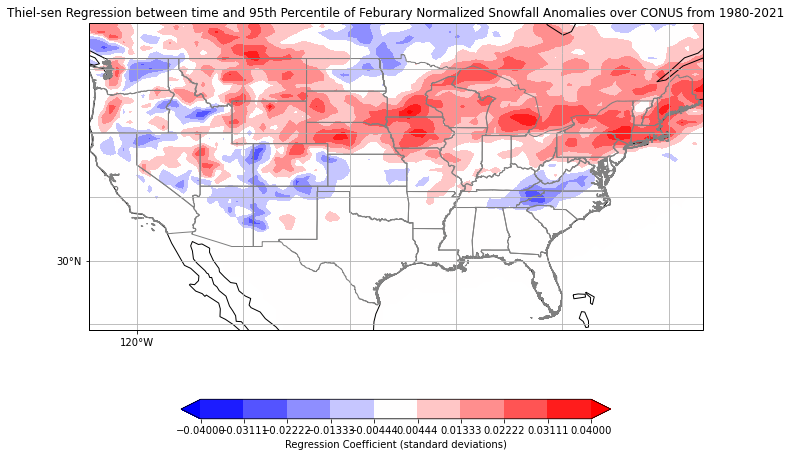

In [40]:
clevs=np.linspace(-0.04,0.04,10)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=m_array_feb
data,lon=add_cyclic_point(data,coord=feb_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,feb_ts['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Regression Coefficient (standard deviations)')

# Add title
plt.title('Thiel-sen Regression between time and 95th Percentile of Feburary Normalized Snowfall Anomalies over CONUS from 1980-2021')
plt.savefig('/homes/areed29/CLIM997/summer22_research/feb95th_thielsen_snowfall.png')

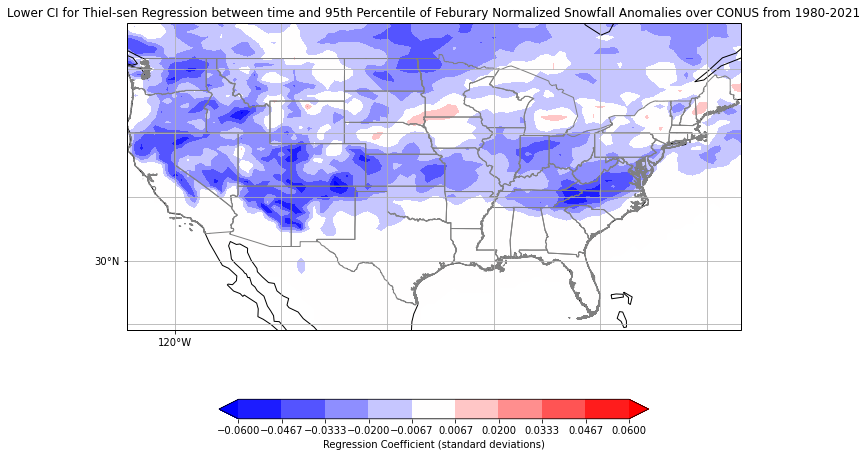

In [43]:
#clevs=np.arange(-0.2,0.2,0.025)
clevs=np.linspace(-0.06,0.06,10)
#clevs=np.linspace(-0.07,0,10)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=low_slope_feb
data,lon=add_cyclic_point(data,coord=feb_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,feb_ts['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Regression Coefficient (standard deviations)')

# Add title
plt.title('Lower CI for Thiel-sen Regression between time and 95th Percentile of Feburary Normalized Snowfall Anomalies over CONUS from 1980-2021')
plt.savefig('/homes/areed29/CLIM997/summer22_research/feb95th_thielsen_snowfall_lowci.png')

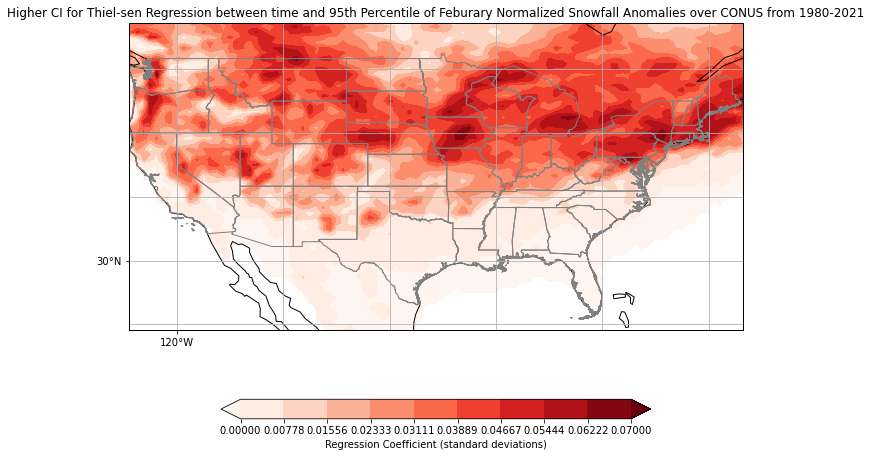

In [45]:
clevs=np.linspace(0,0.07,10)
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=high_slope_feb
data,lon=add_cyclic_point(data,coord=feb_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,feb_ts['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='Reds',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Regression Coefficient (standard deviations)')

# Add title
plt.title('Higher CI for Thiel-sen Regression between time and 95th Percentile of Feburary Normalized Snowfall Anomalies over CONUS from 1980-2021')
plt.savefig('/homes/areed29/CLIM997/summer22_research/feb95th_thielsen_snowfall_highci.png')

### Median Snowfall Trends